In [4]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
'''Problem Statement:
Customer churn prediction aims to identify customers who are likely to discontinue a service.
Early detection helps businesses take preventive actions and improve retention.'''

'Problem Statement:\nCustomer churn prediction aims to identify customers who are likely to discontinue a service.\nEarly detection helps businesses take preventive actions and improve retention.'

In [6]:
'''Dataset Description

The dataset used in this project is the Telco Customer Churn Dataset, provided by IBM.

It contains information about customers of a telecommunications company and whether they have churned (left the service) or not.

Dataset Characteristics:

Total records: ~7,000 customers

Target variable: Churn

Type: Structured tabular data

Domain: Customer analytics / Business intelligence

Features Included:
| Category      | Description                                  |
| ------------- | -------------------------------------------- |
| Customer Info | Gender, SeniorCitizen, Partner, Dependents   |
| Account Info  | Tenure, Contract type, PaperlessBilling      |
| Services Used | InternetService, OnlineSecurity, StreamingTV |
| Billing Info  | MonthlyCharges, TotalCharges                 |
| Payment Info  | PaymentMethod                                |

Target Variable:
Churn = 1 → Customer left the service
Churn = 0 → Customer retained

Objective:
The goal is to build a machine learning classification model that can predict whether a customer is likely to churn based on historical data.'''

'Dataset Description\n\nThe dataset used in this project is the Telco Customer Churn Dataset, provided by IBM.\n\nIt contains information about customers of a telecommunications company and whether they have churned (left the service) or not.\n\nDataset Characteristics:\n\nTotal records: ~7,000 customers\n\nTarget variable: Churn\n\nType: Structured tabular data\n\nDomain: Customer analytics / Business intelligence\n\nFeatures Included:\n| Category      | Description                                  |\n| ------------- | -------------------------------------------- |\n| Customer Info | Gender, SeniorCitizen, Partner, Dependents   |\n| Account Info  | Tenure, Contract type, PaperlessBilling      |\n| Services Used | InternetService, OnlineSecurity, StreamingTV |\n| Billing Info  | MonthlyCharges, TotalCharges                 |\n| Payment Info  | PaymentMethod                                |\n\nTarget Variable:\nChurn = 1 → Customer left the service\nChurn = 0 → Customer retained\n\nObje

In [7]:
'''Model Selection

For this project, Logistic Regression was selected as the baseline machine learning model.

Reasons for Choosing Logistic Regression:
Suitable for binary classification problems
Simple and easy to interpret
Works well with linearly separable data
Provides fast training and prediction
Widely used in industry churn prediction problems

Advantages:
Outputs probability scores for churn prediction
Less prone to overfitting on small-to-medium datasets
Easy to explain during interviews

Workflow:
Data cleaning and preprocessing
Label encoding of categorical features
Feature scaling using StandardScaler
Model training using Logistic Regression
Model evaluation using accuracy, confusion matrix, and classification report'''

'Model Selection\n\nFor this project, Logistic Regression was selected as the baseline machine learning model.\n\nReasons for Choosing Logistic Regression:\nSuitable for binary classification problems\nSimple and easy to interpret\nWorks well with linearly separable data\nProvides fast training and prediction\nWidely used in industry churn prediction problems\n\nAdvantages:\nOutputs probability scores for churn prediction\nLess prone to overfitting on small-to-medium datasets\nEasy to explain during interviews\n\nWorkflow:\nData cleaning and preprocessing\nLabel encoding of categorical features\nFeature scaling using StandardScaler\nModel training using Logistic Regression\nModel evaluation using accuracy, confusion matrix, and classification report'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#

In [9]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.dropna(inplace=True)


In [13]:
df.drop('customerID', axis=1, inplace=True)


In [14]:
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [15]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#

In [18]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(X_test)


In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7853589196872779
[[920 113]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [21]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

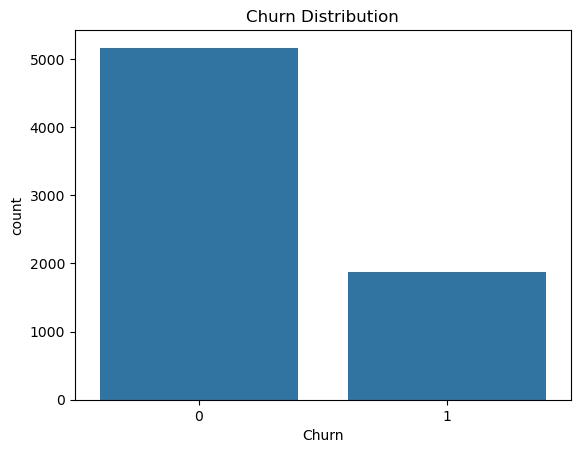

In [22]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [23]:
'''Dataset is imbalanced
More customers do not churn
This affects recall for churn class'''

'Dataset is imbalanced\nMore customers do not churn\nThis affects recall for churn class'

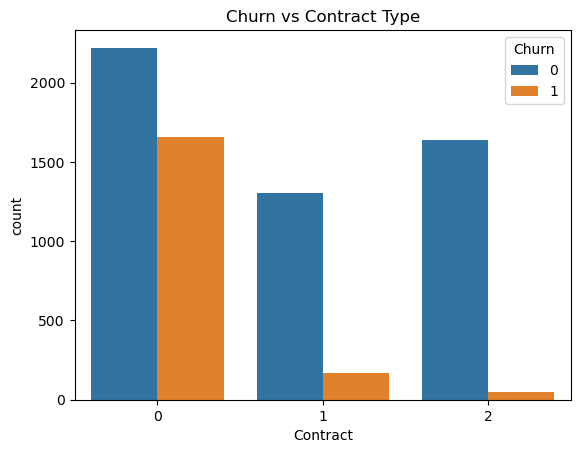

In [24]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn vs Contract Type")
plt.show()


In [25]:
'''Month-to-month customers churn the most
Long-term contracts reduce churn
Contract is a strong predictor'''

'Month-to-month customers churn the most\nLong-term contracts reduce churn\nContract is a strong predictor'

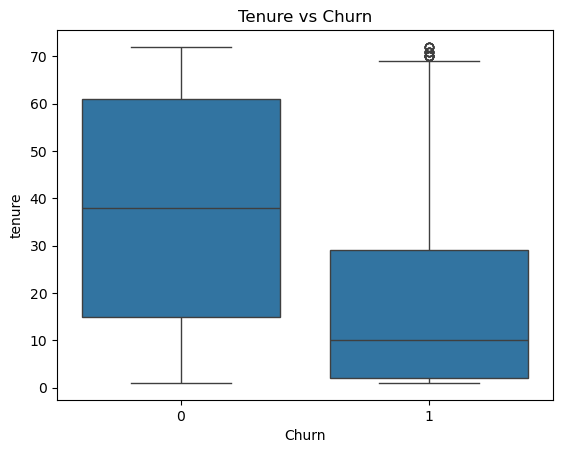

In [26]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

In [27]:
'''New customers are more likely to churn
Longer tenure = higher loyalty'''

'New customers are more likely to churn\nLonger tenure = higher loyalty'

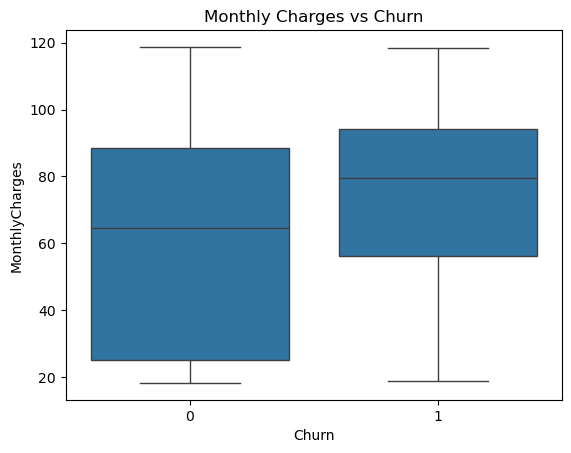

In [28]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [29]:
'''Higher monthly charges → higher churn risk
Pricing impacts retention'''

'Higher monthly charges → higher churn risk\nPricing impacts retention'

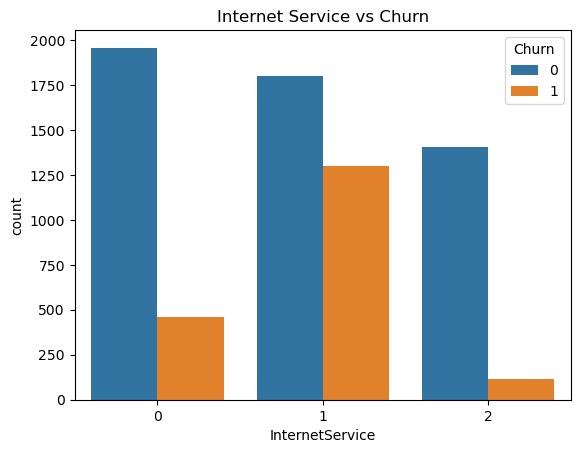

In [30]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()


In [31]:
'''Fiber optic users churn more
Possible quality or pricing issue'''

'Fiber optic users churn more\nPossible quality or pricing issue'

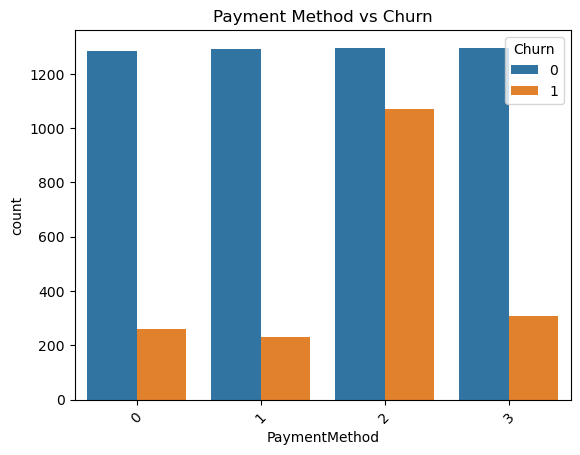

In [32]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()


In [33]:
'''Electronic check users churn more
Auto-payment users churn less'''

'Electronic check users churn more\nAuto-payment users churn less'

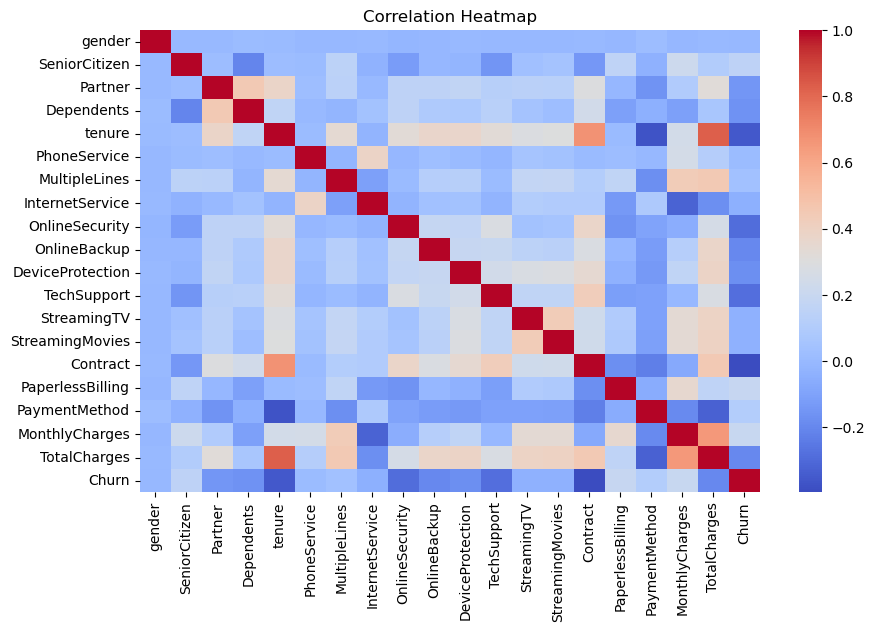

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [35]:
'''Tenure strongly correlated with TotalCharges
No extreme multicollinearity
Suitable for Logistic Regression'''

'Tenure strongly correlated with TotalCharges\nNo extreme multicollinearity\nSuitable for Logistic Regression'

In [36]:
'''
EDA Summary:
Exploratory Data Analysis shows that customer churn is influenced by tenure, contract type, monthly charges, and payment method. Customers with short tenure and month-to-month contracts are more likely to churn. These insights justify the feature selection and model choice.
'''

'\nEDA Summary:\nExploratory Data Analysis shows that customer churn is influenced by tenure, contract type, monthly charges, and payment method. Customers with short tenure and month-to-month contracts are more likely to churn. These insights justify the feature selection and model choice.\n'